In [96]:
import pandas as pd
auto_mpg = pd.read_csv('./auto-mpg.csv')
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [97]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [98]:
auto_mpg=auto_mpg[auto_mpg['horsepower']!='?'] # missing horsepower data is removed
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower']) # type conversio

In [99]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [100]:
auto_mpg['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 93, dtype: int64

In [101]:
from matplotlib import pyplot

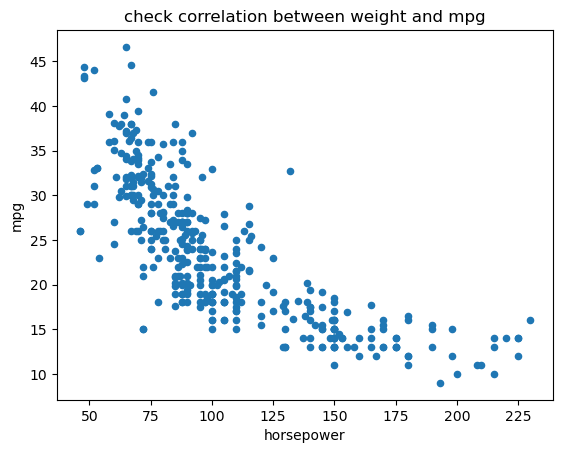

In [112]:
auto_mpg.plot(x='horsepower',y='mpg',kind='scatter',title='check correlation between weight and mpg')
pyplot.show()

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [104]:
train=auto_mpg[0:round(0.8*len(auto_mpg))]
test=auto_mpg[round((0.8*len(auto_mpg))):]

In [106]:
lr=LinearRegression()
model=lr.fit(train[['horsepower']],train['mpg'])
score=model.score(train[['horsepower']],train['mpg'])

predictions=lr.predict(test[['horsepower']])
mse=mean_squared_error(test['mpg'],predictions)
rmse=np.sqrt(mse)

print('Root mean Squared error is using 80-20 hold-out validation is ', rmse)

Root mean Squared error is using 80-20 hold-out validation is  8.15975533079301


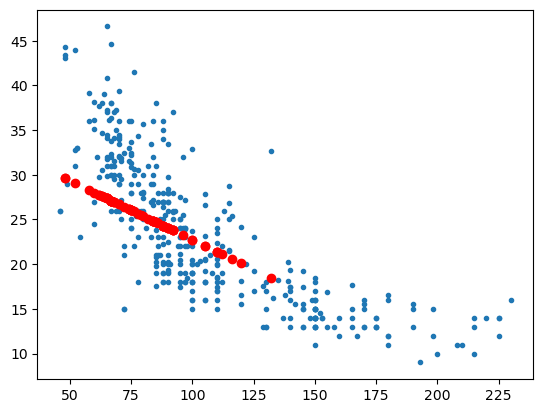

In [123]:
pyplot.plot(auto_mpg['horsepower'], auto_mpg['mpg'], '.')
pyplot.plot(test['horsepower'], predictions, 'ro')
pyplot.show()